In [2]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.TMSUtilities.GetCuts import Cut
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
import uproot, glob, time, copy, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 15

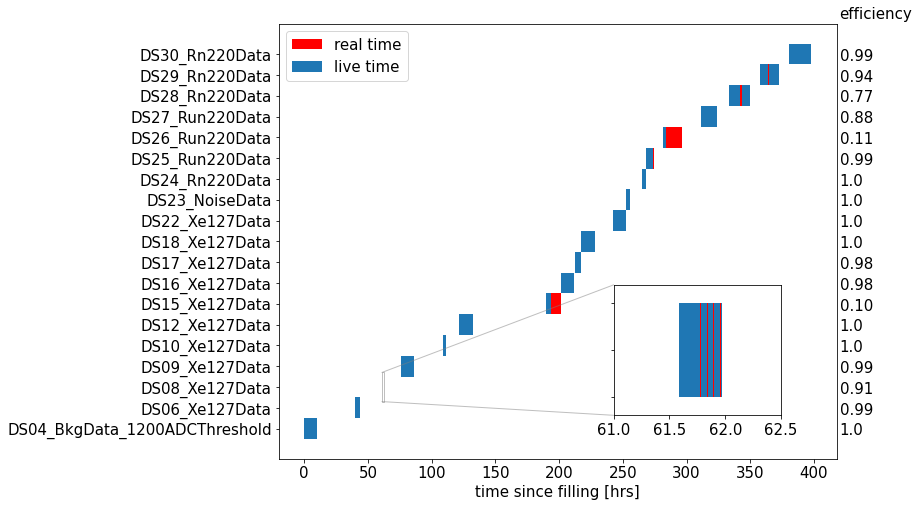

In [83]:
first = True
first_folder = True
i=0
width_y = 1
path_to_reduced = '/p/lustre1/jacopod/31th/'
folder_list = glob.glob(path_to_reduced+'2020*/analysis_500ns/')
sorted_folder = sorted(folder_list)
y_label = []
fig, ax = plt.subplots()
axins = ax.inset_axes([0.6, 0.1, 0.3, 0.3])

for i,folder in enumerate(sorted_folder):
    y_label.append(folder.split('/')[-3][9:])
    delta_x = []
    delta_x_proc = []
    raw_folder = folder[:-15]+'raw_log/*'
    flist_real = sorted(glob.glob(raw_folder))
    flist = glob.glob(folder + '*_reduced.h5')
    for j,fname_real in enumerate(flist_real):
        tstamp = fname_real.split('/')[-1].split('_')[1][:-5]
        try:
            n_tstamp = flist_real[j+1].split('/')[-1].split('_')[1][:-5]
        except IndexError:
            n_tstamp = tstamp
        f_name = datetime.strptime(tstamp, '%Y%m%d%H%M%S')
        s_name = datetime.strptime(n_tstamp, '%Y%m%d%H%M%S')
        if first:
            start_run = f_name
        first = False
        start_x = (f_name-start_run).days*24+(f_name-start_run).seconds/3600.0
        width_x = (s_name-f_name).days*24+(s_name-f_name).seconds/3600.0
        if bool(list(filter(lambda x: tstamp in x,flist))):
            delta_x_proc.append([start_x,width_x])
        else:
            delta_x.append([start_x,width_x])   
    ax.broken_barh(delta_x,(i*width_y,width_y),color='red',edgecolor=None,label='real time')
    ax.broken_barh(delta_x_proc,(i*width_y,width_y),label='live time')
    ax.text(420,i+0.2,str(len(flist)/len(flist_real))[:4])
    axins.broken_barh(delta_x,(i*width_y,width_y),color='red',edgecolor=None,label='real time')
    axins.broken_barh(delta_x_proc,(i*width_y,width_y),label='live time')
    if first_folder:
        plt.legend(loc='upper left')
        first_folder = False
ax.text(420,i+2.2,'efficiency')
x1, x2, y1, y2 = 61, 62.5, 1.8, 3.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins)
ax.set_xlabel('time since filling [hrs]')
plt.yticks(np.arange(len(sorted_folder)) + 0.5,y_label)
axins.set_yticklabels('')
plt.show()